# Libraries Import

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output
import tensorflow as tf
from tensorflow.keras import layers, models

## FIGURE GENERATOR

### LINES


In [3]:
def line_vd(input,rec,n_frames,height=100, width=100):

    x1=np.random.randint(0, width-1)
    x2=np.random.randint(0, width-1)
    y1=np.random.randint(0, height-1)
    y2=np.random.randint(0, height-1)
    thickness=np.random.randint(1, 3)
    
    vd_ls=[]

    for _ in range(n_frames):
        
        image = np.zeros((height, width), dtype=np.uint8)

        x1+= np.random.randint(-int(width*0.02), int(width*0.02))
        x2+=np.random.randint(-int(width*0.06), int(width*0.06))
        y1+= np.random.randint(-int(height*0.02), int(height*0.02))
        y2+=np.random.randint(-int(height*0.06), int(height*0.06))
        
        cv2.line(image, (x1, y1), (x2, y2), color=255, thickness=thickness)
        vd_ls.append(image)

    input[rec]['vd_d']=np.array(vd_ls)
    input[rec]['label']=0

    return input

        

### CIRCLES


In [4]:
def circle_vd(input,rec,n_frames,height=100, width=100):
    
    thickness=np.random.randint(1, 2)
    x= np.random.randint(int(0+width*0.3), int(width - width*0.3))
    y=np.random.randint(int(0+height*0.3), int(height-height*0.3))
    radio = np.random.randint(12, 17)
    vd_ls=[]

    for _ in range(n_frames):
        
        image = np.zeros((height, width), dtype=np.uint8)

        x+= np.random.randint(-int(width*0.03), int(width*0.03))
        y+= np.random.randint(-int(height*0.03), int(height*0.03))
        radio += np.random.randint(-int(height*0.01), int(height*0.02))
        
        cv2.circle(image, (x,y), radio, color=255, thickness=thickness)
        vd_ls.append(image)

    input[rec]['vd_d']=np.array(vd_ls)
    input[rec]['label']=1

    return input

    

# DATA GENERATOR

In [5]:
height, wide = 100, 100
n_recs=30
min_frm,max_frm=5,10

input_d={'I'+ str(ii):{} for ii in range(n_recs)}

for R in input_d.keys():

    n_frames=np.random.randint(min_frm,max_frm)
    input_c=input_d.copy()
    n_rdm=np.random.rand()

    if n_rdm>=0.5:input_d=line_vd(input_c,R,n_frames,height, wide)
    else:input_d=circle_vd(input_c,R,n_frames,height, wide)


In [6]:
print('RECORD - LABEL - SHAPE')
for R in input_d.keys():
    print(R,input_d[R]['label'],np.shape(input_d[R]['vd_d']),type(input_d[R]['vd_d']))

RECORD - LABEL - SHAPE
I0 0 (5, 100, 100) <class 'numpy.ndarray'>
I1 1 (8, 100, 100) <class 'numpy.ndarray'>
I2 1 (9, 100, 100) <class 'numpy.ndarray'>
I3 0 (5, 100, 100) <class 'numpy.ndarray'>
I4 1 (6, 100, 100) <class 'numpy.ndarray'>
I5 1 (5, 100, 100) <class 'numpy.ndarray'>
I6 1 (9, 100, 100) <class 'numpy.ndarray'>
I7 0 (7, 100, 100) <class 'numpy.ndarray'>
I8 1 (6, 100, 100) <class 'numpy.ndarray'>
I9 0 (9, 100, 100) <class 'numpy.ndarray'>
I10 0 (9, 100, 100) <class 'numpy.ndarray'>
I11 0 (7, 100, 100) <class 'numpy.ndarray'>
I12 1 (6, 100, 100) <class 'numpy.ndarray'>
I13 0 (9, 100, 100) <class 'numpy.ndarray'>
I14 0 (7, 100, 100) <class 'numpy.ndarray'>
I15 0 (5, 100, 100) <class 'numpy.ndarray'>
I16 0 (9, 100, 100) <class 'numpy.ndarray'>
I17 0 (5, 100, 100) <class 'numpy.ndarray'>
I18 0 (5, 100, 100) <class 'numpy.ndarray'>
I19 1 (6, 100, 100) <class 'numpy.ndarray'>
I20 0 (9, 100, 100) <class 'numpy.ndarray'>
I21 0 (9, 100, 100) <class 'numpy.ndarray'>
I22 1 (5, 100, 100)

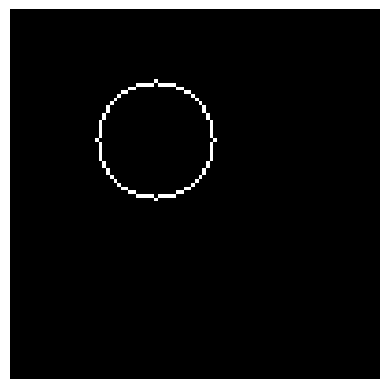

In [7]:
video_check,rec_check=True,'I4'

if video_check:
    
    t_btw_frm=0.2

    for ii in range(len(input_d[rec_check]['vd_d'])):

        imagen = input_d[rec_check]['vd_d'][ii]

        plt.imshow(imagen, cmap='gray')
        plt.axis('off')
        plt.show()
        time.sleep(t_btw_frm)
        clear_output(wait=True)

# Neural network

### GENERATE TRAIN DATA

In [8]:

max_frm_n=max([len(input_d[R]['vd_d']) for R in input_d.keys()])
x_train,y_train=[],[]

for R in input_d.keys():

    vd=input_d[R]['vd_d']
    vd = vd[:, :, :, np.newaxis]
    x_train.append(vd)
    y_train.append(input_d[R]['label'])

for i, video in enumerate(x_train):
    frames_actual = video.shape[0]
    if frames_actual < max_frm_n:
        
        padding = np.zeros((max_frm_n - frames_actual, height, wide, 1))
        x_train[i] = np.concatenate([video, padding], axis=0)
    elif frames_actual > max_frm_n:
        
        x_train[i] = video[:max_frm_n, :, :, :]

X_train = np.array(x_train)
Y_train = np.array(y_train)

#X_train, Y_train = X_train / 255.0, Y_train / 255.0

for ii in range(len(input_d.keys())): print(np.shape(X_train[ii]),Y_train[ii])


(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 1
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0
(9, 100, 100, 1) 1
(9, 100, 100, 1) 0
(9, 100, 100, 1) 0


### GENERATE MODEL

In [9]:

model = models.Sequential()

model.add(layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu'), input_shape=(max_frm_n, height, wide, 1)))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

model.add(layers.TimeDistributed(layers.Conv2D(16, (3, 3), activation='relu')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))

# Capa LSTM
model.add(layers.TimeDistributed(layers.Flatten()))
model.add(layers.LSTM(16))

# Capa densa de salida
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 9, 98, 98, 16)     160       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 9, 49, 49, 16)     0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 9, 47, 47, 16)     2320      
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 9, 23, 23, 16)     0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 9, 8464)           0

In [10]:

model.fit(X_train, Y_train, epochs=10, batch_size=32)


Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.7152 - accuracy: 0.4667
Epoch 2/10
1/1 [==============================] - 0s 331ms/step - loss: 0.4446 - accuracy: 0.9667
Epoch 3/10
1/1 [==============================] - 0s 356ms/step - loss: 0.3284 - accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 315ms/step - loss: 0.2916 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 309ms/step - loss: 0.2626 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 315ms/step - loss: 0.2399 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 347ms/step - loss: 0.2203 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 385ms/step - loss: 0.1984 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 335ms/step - loss: 0.1793 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 326ms/step - loss: 0.1617 - accuracy: 1.0000


### MODEL PREDICTION

In [11]:

verification_input_d={'LINE':{}, 'CIRCLE':{}}
n_frames=np.random.randint(min_frm,max_frm)

verification_input_c=verification_input_d.copy()
verification_input_d=line_vd(verification_input_c,'LINE',n_frames,height, wide)

verification_input_c=verification_input_d.copy()
verification_input_d=circle_vd(verification_input_c,'CIRCLE',n_frames,height, wide)



In [12]:

print('RECORD - LABEL - SHAPE')
for R in verification_input_d.keys():
    print(R,verification_input_d[R]['label'],np.shape(verification_input_d[R]['vd_d']),type(verification_input_d[R]['vd_d']))


RECORD - LABEL - SHAPE
LINE 0 (7, 100, 100) <class 'numpy.ndarray'>
CIRCLE 1 (7, 100, 100) <class 'numpy.ndarray'>


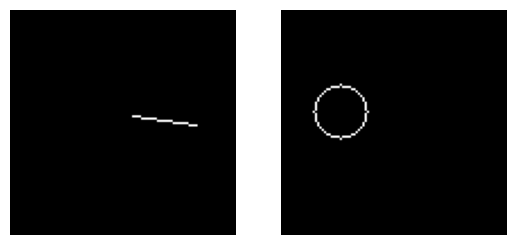

In [13]:

t_btw_frm=0.2

for ii in range(len(verification_input_d['LINE']['vd_d'])):
    
    im_line = verification_input_d['LINE']['vd_d'][ii]
    im_circle = verification_input_d['CIRCLE']['vd_d'][ii]
    fig, axs = plt.subplots(1, 2)#, figsize=(10, 5))

    axs[0].imshow(im_line , cmap='gray')
    axs[0].axis('off')
    axs[1].imshow(im_circle, cmap='gray')
    axs[1].axis('off')

    plt.show()
    time.sleep(t_btw_frm)
    clear_output(wait=True)

In [14]:
vd_line=verification_input_d['LINE']['vd_d']
vd_line = vd_line[:, :, :, np.newaxis]

if vd_line.shape[0] < max_frm_n:
    
    padding = np.zeros((max_frm_n - vd_line.shape[0],  height, wide, 1))
    vd_line = np.concatenate([vd_line, padding], axis=0)

vd_circle=verification_input_d['CIRCLE']['vd_d']
vd_circle = vd_circle[:, :, :, np.newaxis]

if vd_circle.shape[0] < max_frm_n:
    
    padding = np.zeros((max_frm_n - vd_circle.shape[0],  height, wide, 1))
    vd_circle = np.concatenate([vd_circle, padding], axis=0)

In [15]:

pred_line = model.predict(np.expand_dims(vd_line, axis=0))
pred_line_r=np.round(pred_line[0][0], decimals=4)

pred_circle = model.predict(np.expand_dims(vd_circle, axis=0))
pred_circle_r=np.round(pred_circle[0][0], decimals=4)

print('VIDEO LÍNEA:')
if pred_line >=0.5: print(f'Es {pred_line_r*100} % CÍRCULO')
else:print(f'Es {(1-pred_line_r)*100} % LÍNEA')
print(' ')

print('VIDEO CÍRCULO:')
if pred_circle >=0.5: print(f'Es {(pred_circle_r)*100} % CÍRCULO')
else:print(f'Es {(1-pred_circle_r)*100} % LÍNEA')


1/1 [==============================] - 0s 16ms/step
VIDEO LÍNEA:
Es 80.90000003576279 % LÍNEA
 
VIDEO CÍRCULO:
Es 64.96000289916992 % CÍRCULO
